In [2]:
!pip install transformers sentencepiece

In [14]:
from transformers import pipeline
import pandas as pd



# 1) Question-Answering



In [4]:
qa = pipeline("question-answering", model="deepset/roberta-base-squad2")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


In [5]:
context = """
The Internet was originally developed as ARPANET in the late 1960s by the United States Department of Defense.
Its primary purpose was to allow secure and reliable communication between computers during the Cold War.
Over time, the network expanded beyond military use and gradually became available to universities,
research institutions, and later the general public. Today, the Internet is a global system connecting billions
of devices and enabling communication, commerce, entertainment, and information sharing across the world.
"""


In [6]:
q1 = "Who developed the first form of the Internet?"
print("Q1:", q1)
print(qa(question=q1, context=context))


Q1: Who developed the first form of the Internet?
{'score': 0.5067271590232849, 'start': 75, 'end': 110, 'answer': 'United States Department of Defense'}


In [7]:
q2 = "Why was the original ARPANET created?"
print("Q2:", q2)
print(qa(question=q2, context=context))



Q2: Why was the original ARPANET created?
{'score': 0.3670360743999481, 'start': 136, 'end': 216, 'answer': 'to allow secure and reliable communication between computers during the Cold War'}


In [13]:
q3 = "What is the internet known as?"
print("Q3:", q3)
print(qa(question=q3, context=context)["answer"])


Q3: What is the internet known as?
ARPANET


# 2) Custom Named Entity Extractor (NER)

In [15]:
ner = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [16]:
text = """
I work at Google as a Machine Learning Engineer. Before this, I interned at Microsoft
and collaborated with Dr. Sarah Johnson on AI research. I also worked with Elon Musk’s
team for a short project.
"""

In [17]:
entities = ner(text)

In [19]:
filtered = [
    {
        "Entity": ent["word"],
        "Type": ent["entity_group"],
        "Confidence": round(ent["score"], 4)
    }
    for ent in entities
    if ent["entity_group"] in ["PER", "ORG"]
]

In [20]:
df = pd.DataFrame(filtered)

In [21]:
df

,Entity,Type,Confidence
0,Google,ORG,0.9990
1,Learning,ORG,0.4263
2,Microsoft,ORG,0.9995
3,Sarah Johnson,PER,0.9996
4,Elon Musk,PER,0.9978


# 3) Multilingual Experiment (Translation)

In [22]:
# English → French
en_fr = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")

# English → Hindi
en_hi = pipeline("translation", model="Helsinki-NLP/opus-mt-en-hi")

# French → English
fr_en = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")

# Hindi → English
hi_en = pipeline("translation", model="Helsinki-NLP/opus-mt-hi-en")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/304M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [27]:
english_text = """
Terry Griffiths (1947–2024) was a Welsh professional snooker player, coach and pundit.
After winning several amateur titles, he turned professional in June 1978 at the age of 30.
In his second professional tournament, he qualified for the 1979 World Snooker Championship.
He reached the final of the event where he defeated Dennis Taylor. In the 1988 World Snooker Championship,
Griffiths again reached the final of the competition but lost to Steve Davis.
"""

print("ORIGINAL ENGLISH TEXT:\n", english_text)

ORIGINAL ENGLISH TEXT:
 
Terry Griffiths (1947–2024) was a Welsh professional snooker player, coach and pundit. 
After winning several amateur titles, he turned professional in June 1978 at the age of 30. 
In his second professional tournament, he qualified for the 1979 World Snooker Championship. 
He reached the final of the event where he defeated Dennis Taylor. In the 1988 World Snooker Championship, 
Griffiths again reached the final of the competition but lost to Steve Davis.



In [28]:
french_text = en_fr(english_text)[0]['translation_text']
print("\n🇫🇷 FRENCH TRANSLATION:\n", french_text)


🇫🇷 FRENCH TRANSLATION:
 Terry Griffiths (1947-2024) est un joueur de snooker professionnel gallois, entraîneur et pundit. Après avoir remporté plusieurs titres d'amateur, il devient professionnel en juin 1978 à l'âge de 30 ans. Lors de son deuxième tournoi professionnel, il se qualifie pour le Championnat du monde de snooker 1979. Il arrive à la finale de l'épreuve où il bat Dennis Taylor.


In [30]:
hindi_text = en_hi(english_text)[0]['translation_text']
print("\n🇮🇳 HINDI TRANSLATION:\n", hindi_text)


🇮🇳 HINDI TRANSLATION:
 अपनी दूसरी पेशेवर यात्रा - समिति में उन्होंने 1979 विश्व Snercrodes के लिए योग्य बन गया। वह उस घटना के अंतिम में पहुँच गया, जहाँ वह था...


# 4) Dual-Model Summarizer

In [32]:
bart = pipeline("summarization", model="facebook/bart-large-cnn")
t5 = pipeline("summarization", model="t5-small")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [34]:
text = """
The Internet is a global system of interconnected computer networks that use the Internet protocol suite (TCP/IP) to
communicate between networks and devices. It is a network of networks that consists of private, public, academic,
business, and government networks of local to global scope, linked by a broad array of electronic, wireless, and optical
networking technologies. The Internet carries a vast range of information resources and services, such as the
interlinked hypertext documents and applications of the World Wide Web (WWW), electronic mail, telephony, and file
sharing. Origins of the Internet trace back to research commissioned by the United States government in the 1960s to
build robust, fault-tolerant communication via computer networks. The ARPANET initially served as a backbone for
interconnection of regional academic and military networks in the 1970s. Funding for the NSFNET expansion in the
1980s, as well as private funding for other commercial extensions, led to worldwide participation in the development of
new networking technologies and the merging of many networks. The linking of commercial networks and enterprises by
the early 1990s marked the beginning of the modern Internet transition, generating rapid growth as institutional,
personal, and mobile computers were connected to the network. Although the Internet was widely used by academia in the
1980s, the commercialization incorporated its services and technologies into virtually every aspect of modern life.
Today, the Internet has become an essential tool for communication, commerce, research, education, politics, healthcare,
and entertainment. Its continuous expansion has led to concerns related to privacy, surveillance, misinformation, and
digital security, which remain ongoing challenges. Governments and international bodies continue to debate and
establish policies to regulate Internet access, preserve online freedoms, and ensure equitable digital participation.
"""


In [35]:
bart_summary = bart(text, max_length=130, min_length=80, do_sample=False)[0]['summary_text']
print(bart_summary)

The Internet is a global system of interconnected computer networks that use the Internet protocol suite (TCP/IP) tocommunicate between networks and devices. It is a network of networks that consists of private, public, academic, business, and government networks of local to global scope. The Internet carries a vast range of information resources and services, such as the World Wide Web (WWW), electronic mail, telephony, and file sharing.


In [36]:
t5_input = "summarize: " + text
t5_summary = t5(t5_input, max_length=130, min_length=80, do_sample=False)[0]['summary_text']
print(t5_summary)

Both `max_new_tokens` (=256) and `max_length`(=130) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


the Internet is a global system of interconnected computer networks . it consists of private, public, academic, business, and government networks of local to global scope . origins of the Internet trace back to research commissioned by the united states in the 1960s to build robust, fault-tolerant communication . the internet has become an essential tool for communication, commerce, research, education, politics, healthcare, and entertainment .


In [38]:
print("\n===================== COMPARISON =====================\n")
print(f"BART summary length: {len(bart_summary.split())} words")
print(f"T5 summary length:   {len(t5_summary.split())} words")


===================== COMPARISON =====================

BART summary length: 67 words
T5 summary length:   66 words


# 5) Batch Image Classification


In [54]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image, UnidentifiedImageError
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [73]:
image_paths = [
    # --- CAT IMAGES ---
    "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg",
    "https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg",
    "https://images.pexels.com/photos/2071873/pexels-photo-2071873.jpeg",

    # --- DOG IMAGES ---
    "https://images.pexels.com/photos/1805164/pexels-photo-1805164.jpeg",
    "https://images.pexels.com/photos/4587991/pexels-photo-4587991.jpeg",
    "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg",

    # --- HORSE IMAGES ---
    "https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg",
    "https://images.pexels.com/photos/1581058/pexels-photo-1581058.jpeg",
    "https://images.pexels.com/photos/161931/horse-arabian-horse-animal-161931.jpeg"
]

In [71]:
def load_image(path_or_url):
    try:
        if path_or_url.startswith("http"):
            # load image from URL
            response = requests.get(path_or_url, timeout=10)
            img = Image.open(BytesIO(response.content)).convert("RGB")
        else:
            # load local image
            img = Image.open(path_or_url).convert("RGB")
        return img
    except (UnidentifiedImageError, OSError, ValueError):
        print(f"⚠️ Skipping invalid image: {path_or_url}")
        return None

In [56]:
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [74]:
images = []
valid_names = []

for path in image_paths:
    img = load_image(path)
    if img is not None:
        images.append(img)
        valid_names.append(path)

⚠️ Skipping invalid image: https://images.pexels.com/photos/1581058/pexels-photo-1581058.jpeg
⚠️ Skipping invalid image: https://images.pexels.com/photos/161931/horse-arabian-horse-animal-161931.jpeg


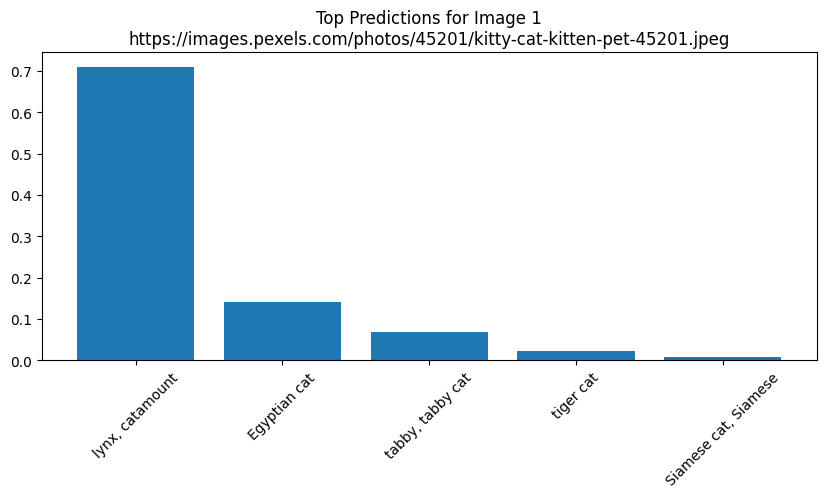

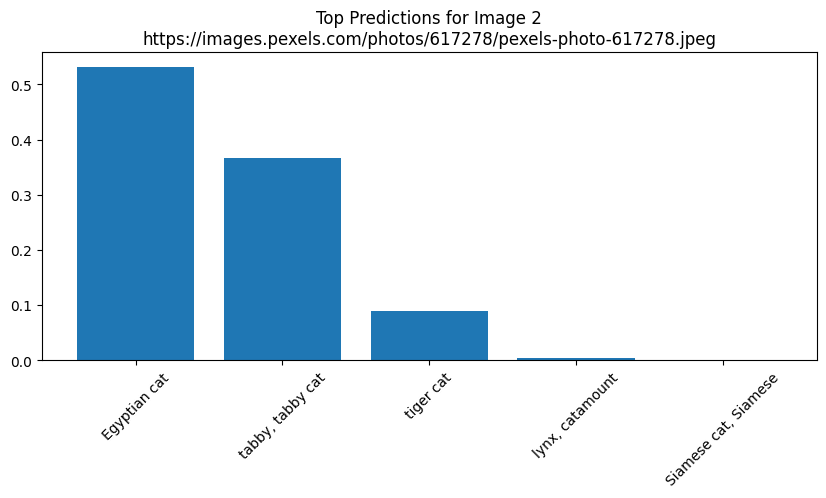

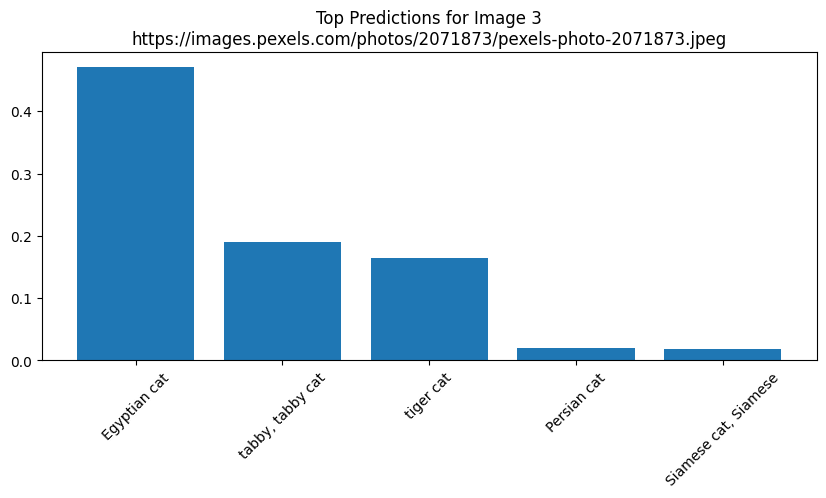

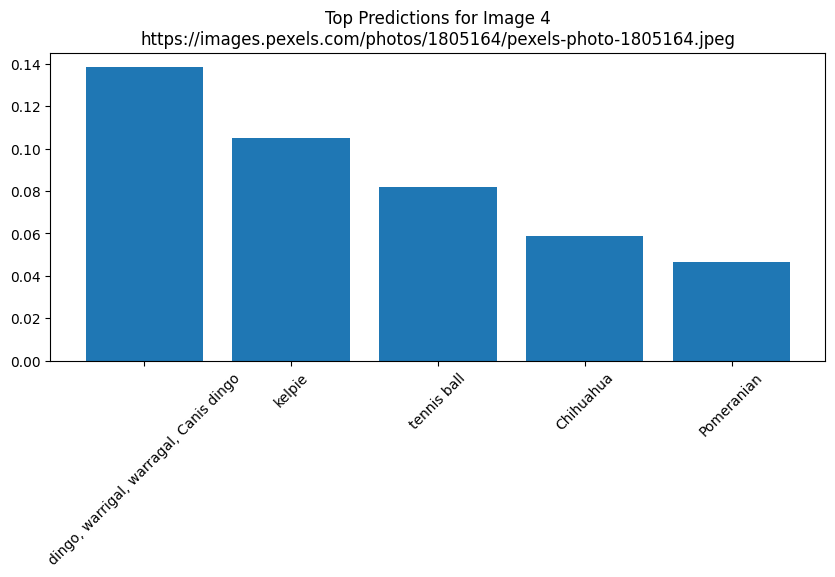

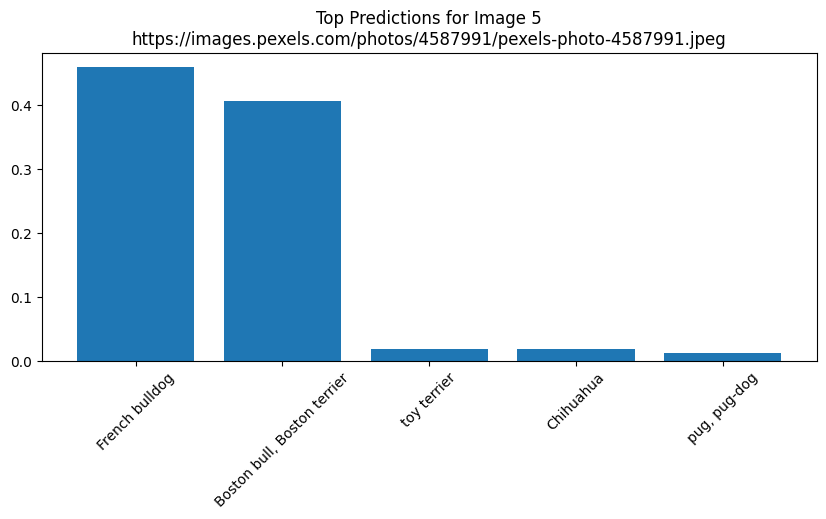

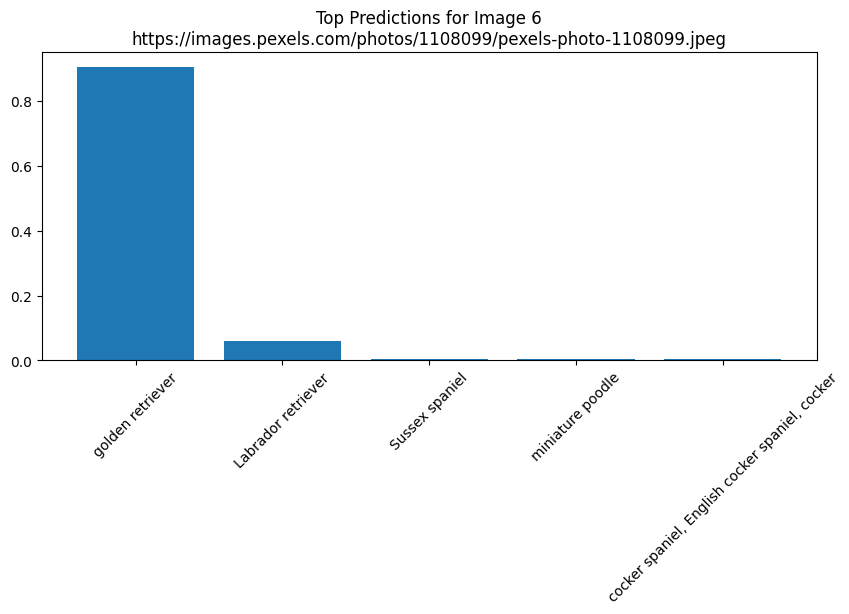

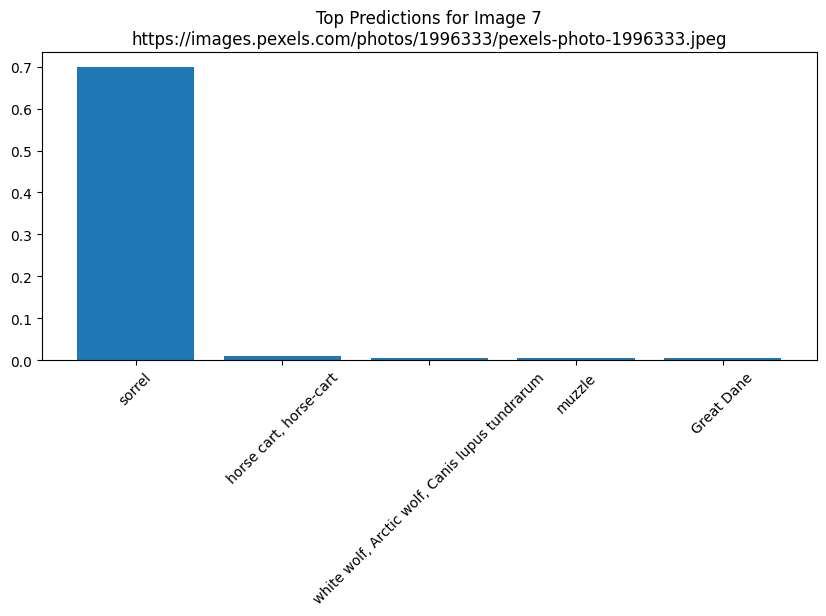

In [75]:
if len(images) == 0:
    print("No valid images found. Stopping...")
else:
    inputs = processor(images=images, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    probs = probs.numpy()

    labels = model.config.id2label

    # -------------------------
    # PLOT BAR CHART FOR EACH
    # -------------------------
    for i in range(len(images)):
        plt.figure(figsize=(10, 4))
        top5_idx = probs[i].argsort()[-5:][::-1]

        plt.bar([labels[j] for j in top5_idx], probs[i][top5_idx])
        plt.title(f"Top Predictions for Image {i+1}\n{valid_names[i]}")
        plt.xticks(rotation=45)
        plt.show()